Questions for Django Trainee at Accuknox

Topic: Django Signals

Question 1: By default are django signals executed synchronously or asynchronously? Please support your answer with a code snippet that conclusively proves your stance. The code does not need to be elegant and production ready, we just need to understand your logic.





In [ ]:
import time
from django.db.models.signals import post_save
from django.dispatch import receiver
from django.contrib.auth.models import User

# here is signal 
@receiver(post_save, sender=User)
def my_handler(sender, **kwargs):
    print("Signal received. Starting handler...")
    time.sleep(5)  # Simulate a long-running task
    print("Handler finished.")

user = User(username='harsh')
user.set_password('p123') 
user.save()
print("User save completed.")


<b>Django signals are executed synchronously. This means the signal's receiver function will block the process and wait until it completes before continuing the execution of the subsequent code.</b>


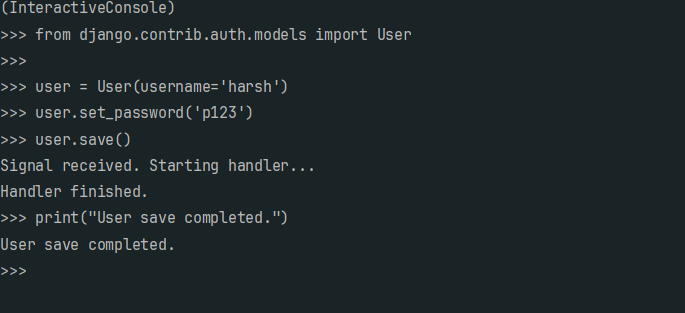

<b>Question 2</b>
 Do django signals run in the same thread as the caller? Please support your answer with a code snippet that conclusively proves your stance. The code does not need to be elegant and production ready, we just need to understand your logic.

In [ ]:
import time
import threading
from django.db.models.signals import post_save
from django.dispatch import receiver
from django.contrib.auth.models import User

@receiver(post_save, sender=User)
def my_handler(sender, **kwargs):
    print(f"Signal received in thread: {threading.current_thread().name}")
    time.sleep(2)  #Todo long-running task
    print("Handler finished.")

print(f"Caller thread: {threading.current_thread().name}")
user = User(username='testuser')
user.set_password('password123')
user.save()
print("User save completed.")


<b>Ans:-Yes, Django signals run in the same thread as the caller by default.</b>

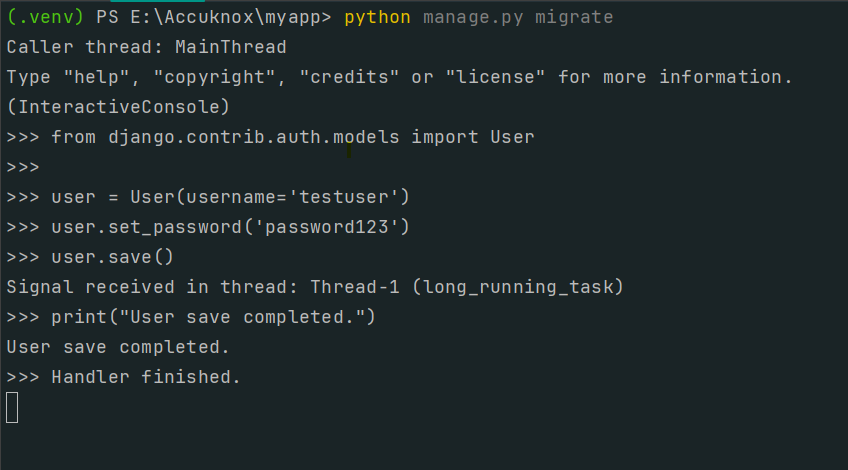

<b>Question 3: By default do django signals run in the same database transaction as the caller? Please support your answer with a code snippet that conclusively proves your stance. The code does not need to be elegant and production ready, we just need to understand your logic.</b>


In [ ]:

from django.db import models, transaction
from django.db.models.signals import post_save
from django.dispatch import receiver

class HD(models.Model):
    name = models.CharField(max_length=255)

# Define a signal receiver
@receiver(post_save, sender=HD)
def my_signal_receiver(sender, instance, **kwargs):
    print(f"Signal received instance with name: {instance.name}")
    raise RuntimeError("Error in signal handler")

# Create a model instance in transaction
try:
    with transaction.atomic():
        print("Starting transaction...")
        my_obj = HD(name="hd")
        my_obj.save()  
except RuntimeError as e:
    print(f"Error caught: {e}")

if HD.objects.filter(name="hd").exists():
    print("Model instance was saved")
else:
    print("rollback successful")



<b>Yes, by default, Django signals run in the same database transaction as the caller. If an exception is raised in the signal handler, it will roll back the entire transaction, including the model save operation that triggered the signal.
</b>
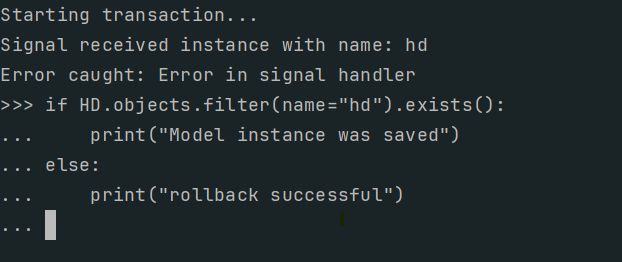

Topic: Custom Classes in Python

Description: You are tasked with creating a Rectangle class with the following requirements:

An instance of the Rectangle class requires length:int and width:int to be initialized.
We can iterate over an instance of the Rectangle class 
When an instance of the Rectangle class is iterated over, we first get its length in the format: {'length': <VALUE_OF_LENGTH>} followed by the width {width: <VALUE_OF_WIDTH>}


In [5]:
class Rectangle:
    def __init__(self,length:int,width:int):
        self.length = length
        self.width = width

    def __iter__(self):
        yield{'length:': self.length}
        yield{'width:': self.width}


rect = Rectangle(10,6)


for ans in rect:
    print(ans)

{'length:': 10}
{'width:': 6}
